 # Medical Cost Personal Insurance EDA & Linear Regression
## Data Dictionary
Age: age of primary beneficiary

Sex: insurance contractor gender, female, male

BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Children: Number of children covered by health insurance / Number of dependents  

Smoker: Smoking  

Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

Charges: Individual medical costs billed by health insurance

### Objective
The main aim of this notebook is to analyse how are the insurance cost impacted based on different variables which include region, age, whether a child or not, sex, bmi, smoker etc...

Each column is picked and analysed how they influence the insurance charge.

We'll be building and training a machine learning model that predicts insurance cost based on certain feature.

For easy understanding we'll be using graphs and plots because visualisation is the best way to understand.

In [ ]:
# hiding unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# importing dataset into jupyter notebook
medical_df = pd.read_csv('insurance.csv')

In [ ]:
# viewing the first 5 rows of the medical insurance dataset
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The above table shows the first five rows of our dataset.

In [ ]:
# getting the shape of the dataframe
medical_df.shape

(1338, 7)

The medical insurance dataset contains 1338 rows and 7 columns

In [ ]:
# getting information about the dataset
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In the medical dataset, the entries in the age and children columns are integers, the entries in the sex, smoker and region are characters and the  entries in the bmi and charges columns are decimals.

In [ ]:
# to obtain the statistical summary of non numeric columns in the medical dataset such as unique, top, etc.
medical_df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


This shows the unique values for sex, smoker and region as 2, 2 and 4 respectively, male dorminates the sex count and there are more patients from the Southeast region.

In [ ]:
#statistical summary of dataset for both numeric and non-numeric data
medical_df.describe(include= 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
#statistical summary of columns with numeric data
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# checking for missing values
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset has no missing values

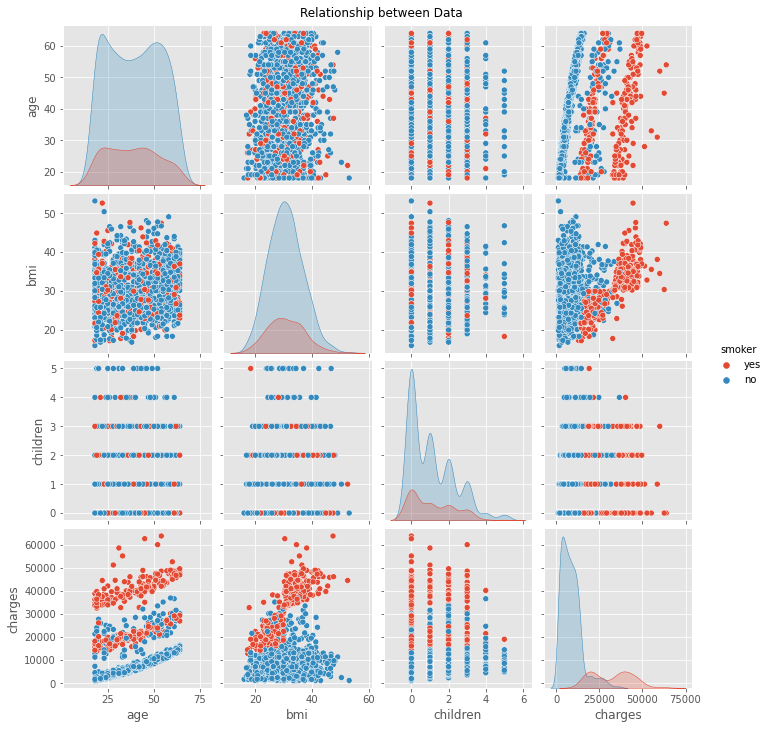

In [ ]:
# to visualize the overall relationship of data using pairplot
sns.pairplot(medical_df, diag_kind ="auto", hue = "smoker").fig.suptitle("Relationship between Data", y=1.01);

Observations:
1. charges: majority of the non smoking patients have low insurance charges
2. BMI: majority of the patienst have a BMI 20-40

In [ ]:
#checking the correlation of numeric columns
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


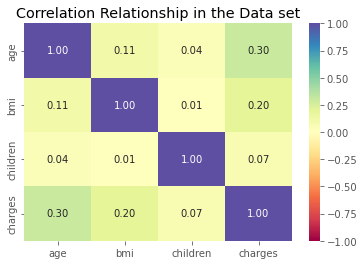

In [ ]:
#Heat map plot of the correlation relationship in data set
plt.title('Correlation Relationship in the Data set')

sns.heatmap(medical_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

Observation:
1. There is a significant correlation between charges and age.
   Meaning that older people are likely to pay more insurance charge.

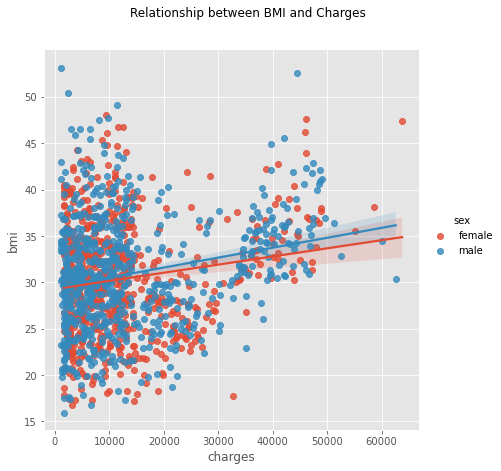

In [ ]:
#gender based relationship between charges and BMI
sns.pairplot(x_vars="charges", y_vars="bmi",
             data=medical_df, kind='reg',
             hue="sex", height=6).fig.suptitle("Relationship between BMI and Charges", y=1.08) ;


Observation:
1. There is a higher positive relationship between charges and BMI for males than for females
2. There is a hgher density between 20-40 BMI and charges below 20,000

In [ ]:
psmoke=medical_df.loc[(medical_df['smoker']=='no')]

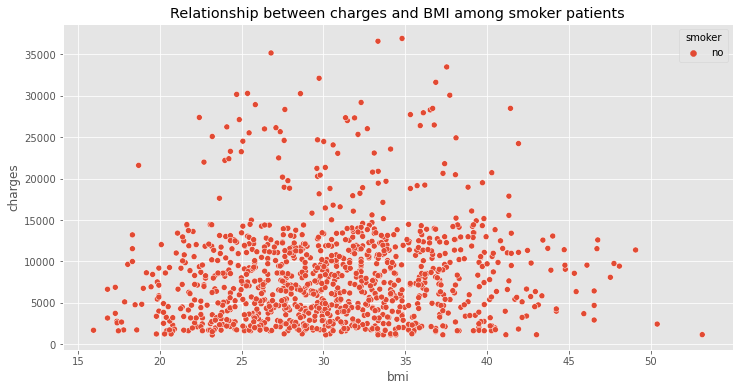

In [ ]:
# Relationship between charges and BMI among smoker patients
plt.figure(figsize=(12, 6))
plt.title('Relationship between charges and BMI among smoker patients')
sns.scatterplot(x='bmi', y='charges',hue='smoker', data=psmoke);

OBSERVATIONS:
1. There is a higher density between charges from 0 to 15,000 and BMI from 20 to 40, patients with bmi between 30 to 35 pay more
2. No definite relationship

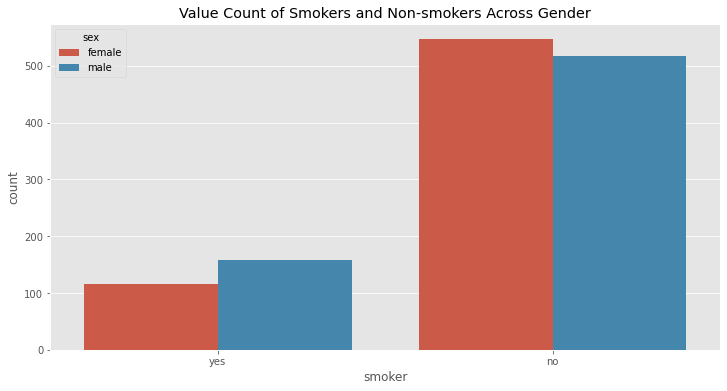

In [ ]:
# value count of smokers and non smokers across gender
plt.figure(figsize=(12, 6))
plt.title('Value Count of Smokers and Non-smokers Across Gender')
sns.countplot(x='smoker', hue='sex' ,data=medical_df);

Observations:
1. Generally, there is a greater number of non smoking patients
2. The number of male smoking patients is higher than that of females, hence more male patients are smokers
3. The number of non smoking female patients is higher than that of males

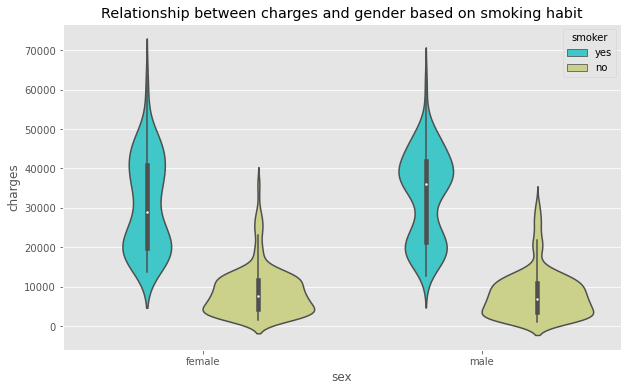

In [ ]:
#showing the charges comparison across gender based on smoking habit
plt.figure(figsize=(10,6))
sns.violinplot(x='sex',y="charges",data=medical_df, hue='smoker', palette='rainbow')
plt.title("Relationship between charges and gender based on smoking habit");

Obervations:
1. For female smokers, the interquartile range is between 19,000 and 41,000 and the median is at 29,000
2. For female non-smokers, there is a higher probability at 4000.
3. For male smokers, the interquartile range is between 21,000 and 43,000 with the median at 36,0000. There is a higher probability at 40000
4. For non-smoking males, a higher distribution and probability 3000


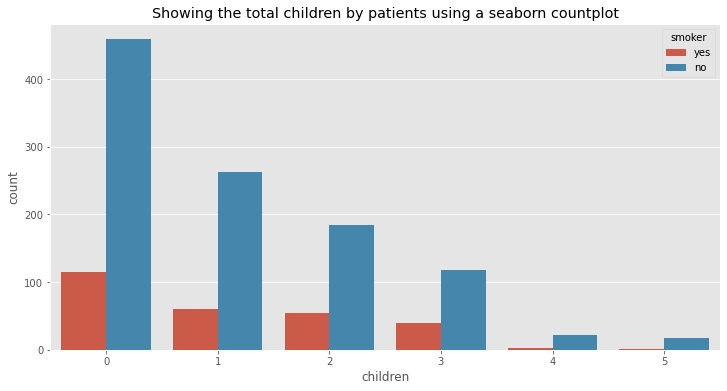

In [ ]:
#to show the total children by patients using a seaborn countplot
plt.figure(figsize=(12, 6))
plt.title('Showing the total children by patients using a seaborn countplot')
sns.countplot(x='children', hue='smoker' ,data=medical_df);

Observations:
1. Non-smoking patients have more children than smoking patients
2. A greater number of non-smoking parents have only one child
3. For smoking patients, a very low  number have up to 5 children, compared to non-smoking patients.

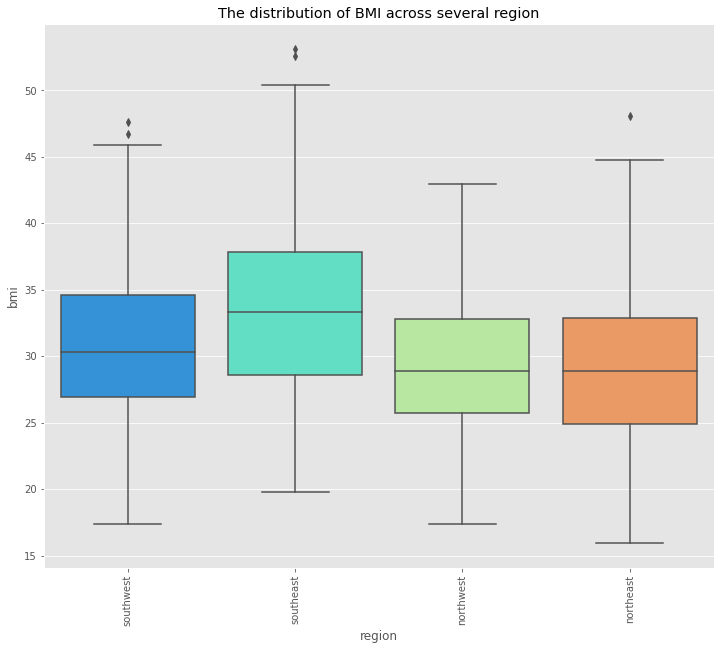

In [ ]:
# Show the distribution of BMI across several region using a boxplot
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.boxplot(x='region',y='bmi',data=medical_df, palette='rainbow')
plt.title("The distribution of BMI across several region");

Obervations:
1. The Northwest region has no outliers
2. Every other region has outliers

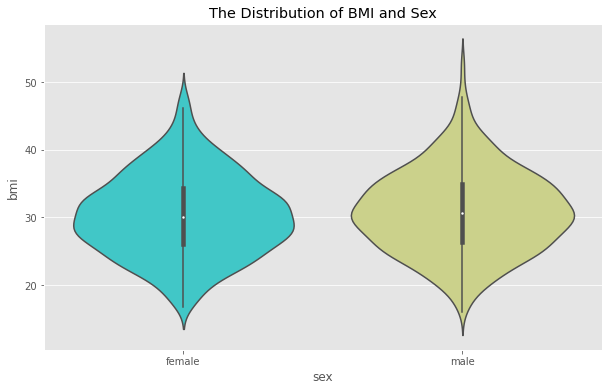

In [ ]:
#to show the Distribution of BMI and sex with a violi plot
plt.figure(figsize=(10,6))
sns.violinplot(x='sex',y="bmi",data=medical_df, palette='rainbow')
plt.title("The Distribution of BMI and Sex");

Observations:
1. There is a higher distribution for both male and female at 30 and 28 respectively
2. The median of the female and male are at 30 and 31 respectively
3. There are more outliers among the male

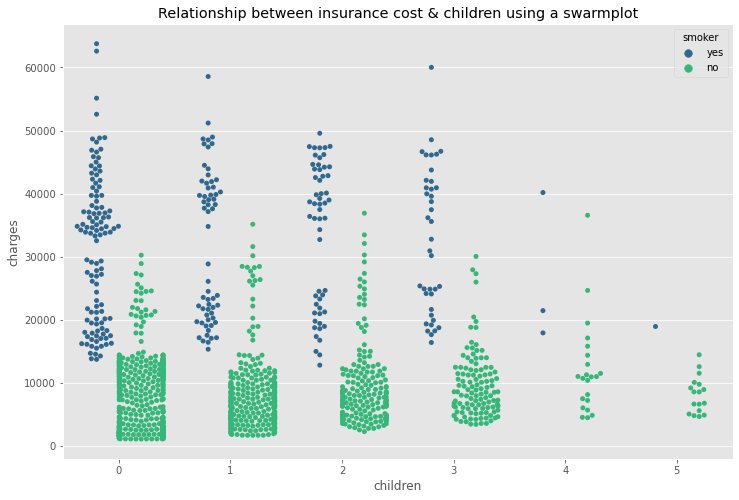

In [ ]:
# to show relationship between insurance cost & smokers using a swarmplot (x-axis = children)
plt.figure(figsize=(12,8))
sns.swarmplot(x='children', y='charges', data=medical_df, hue='smoker', dodge=True, palette='viridis')
plt.title("Relationship between insurance cost & children using a swarmplot");

Observations:
1. The charges for patients that are smokers higher whether they have children or not
2. There are more of patients that are non-smokers
3. There is no non-smoker that pays insurance charge above 40,000

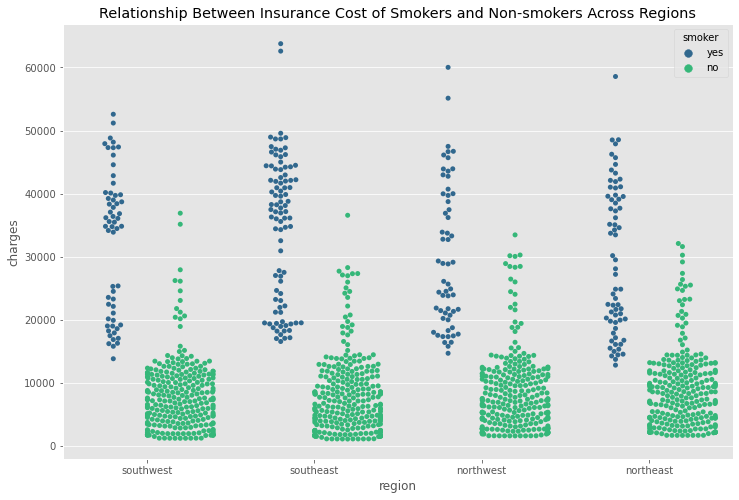

In [ ]:
#plot the insurance charges of smokers vs non smokers across regions using a swarmplot

plt.figure(figsize=(12,8))
sns.swarmplot(x='region', y='charges', data=medical_df, hue='smoker', dodge=True, palette='viridis')
plt.title("Relationship Between Insurance Cost of Smokers and Non-smokers Across Regions");

Observations:
1. Charges for non-smoking patients across all regions is below 40,000
2. Smoking patients from regions pay more than 10,000
3. very few smoking patients pay above 50,000 across all regions

#                                                     Part B

## Q: 1a. How many patients are less than 18 years and equal to 18?

In [ ]:
# 1a. to show the number of  patients that  are less than 18 years and equal to 18?
medical_df.loc[(medical_df['age'] <=18)]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075
...,...,...,...,...,...,...,...
1296,18,male,26.125,0,no,northeast,1708.92575
1315,18,male,28.310,1,no,northeast,11272.33139
1317,18,male,53.130,0,no,southeast,1163.46270
1334,18,female,31.920,0,no,northeast,2205.98080


There are 69 patients that are less than or equal to 18 years old.

# Q1b: Clearly state the existing number of male and female in your result

In [ ]:
#for the number of female in result
medical_df.loc[(medical_df['age'] <= 18
               ) &
               (medical_df['sex'] == 'female')
              ].count()

age         33
sex         33
bmi         33
children    33
smoker      33
region      33
charges     33
dtype: int64

We have 33 female patients from the result of Q1a

In [ ]:
#for the number of males in result
medical_df.loc[(medical_df['age'] <= 18
               ) &
               (medical_df['sex'] == 'male')
              ].count()

age         36
sex         36
bmi         36
children    36
smoker      36
region      36
charges     36
dtype: int64

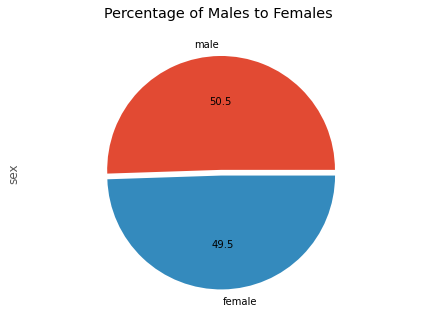

In [ ]:
#percentage of males to females in the data set
medical_df['sex'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f",explode=(0.05,0.0))
#centre_circle = plt.Circle((0,0),0.3,color='black',fc='white',linewidth=0)
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Males to Females ', y=1.08)
plt.show()

50.5% of the patients are males while the rest are females

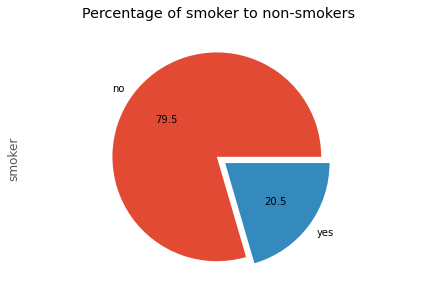

In [ ]:
#percentage of smokers to non-smokers in the data set
medical_df['smoker'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f", explode=(0.10,0.0))
#centre_circle = plt.Circle((0,0),0.3,color='black',fc='white',linewidth=0)
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
plt.title('Percentage of smoker to non-smokers ', y=1.08)

plt.axis('equal')
plt.tight_layout()
plt.show()

79.5% of the patients are non-smokers while 20.5% are smokers

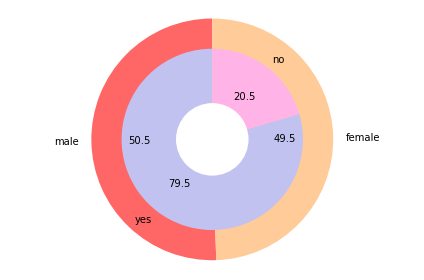

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['male','female']
sizes = medical_df['sex'].value_counts(normalize=True)
labels_smoker = ['yes','no']
sizes_smoker = medical_df['smoker'].value_counts(normalize=True)
colors = ['#ff6666', '#ffcc99',]
colors_gender = ['#c2c2f0','#ffb3e6',]

# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,autopct="%4.1f")
plt.pie(sizes_smoker,labels=labels_smoker, colors=colors_gender,radius=0.75,startangle=90,autopct="%1.1f")
centre_circle = plt.Circle((0,0),0.3,color='black',fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

Observations:
1. 50.5% of the patients are males while the rest are females
2.79.5% of the patients are non-smokers while 20.5% are smokers

# Q.2d: How many patient above 18 have children and how many don't. visually show your result clearly with a pie chart and also show the percentage ratio

In [ ]:
# parents above 18 that have children and those that don't
display(medical_df.groupby((medical_df['age'] > 18))['children'].count())
medical_df.groupby(medical_df['age'] > 18)['children'].value_counts()

age
False      69
True     1269
Name: children, dtype: int64

age    children
False  0            51
       1             9
       2             6
       3             2
       4             1
True   0           523
       1           315
       2           234
       3           155
       4            24
       5            18
Name: children, dtype: int64

Observation:
For patients above 18 years
1. Number of patients that don't have a child is 523
2. Number of patients with children is equal to 746

# Q.2e :What is the total number of children by patient above 18

In [ ]:
#for the number of children by patients above 18
medical_df.loc[(medical_df['age'] >18) & (medical_df['children']>=1)].count()

age         746
sex         746
bmi         746
children    746
smoker      746
region      746
charges     746
dtype: int64

The number of children by patients above 18 is 746

In [ ]:
plot_df=medical_df.loc[(medical_df['children']>=1)].copy()

In [ ]:
medical_df.loc[(medical_df['children']>=1)]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1332,52,female,44.700,3,no,southwest,11411.68500


## Q2f: Using a graph, compare the insurance charges between patients with children and patients without children. Document your findings on how it affect the insurance charge

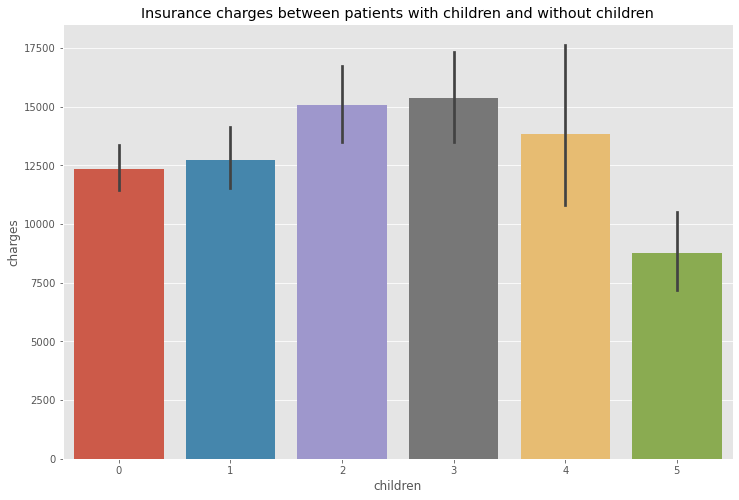

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Insurance charges between patients with children and without children')
sns.barplot(x='children',data=medical_df, y='charges')
plt.show()

Observation:

From the plot above we can see that
1. Patients with 3 children have the highest insurance charge.
2. Patients that have no child have almost the same insurance charges with patients that have just one child.
3. Patients with 5 children have the lowest insurance charge.

### Q2g. Using a graph, compare the insurance charges between smoker and non smoker patients with children. Document your findings on how it affect the insurance charge

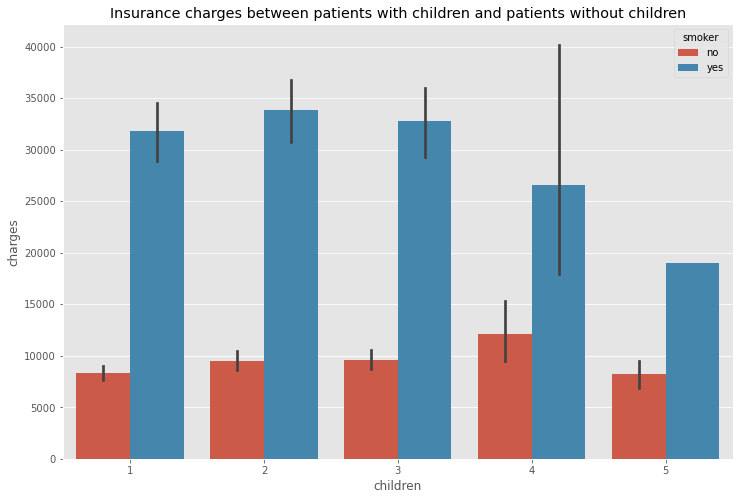

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Insurance charges between patients with children and patients without children')
sns.barplot(x='children',data=plot_df, hue= 'smoker', y='charges')
plt.show()

Observation:
1. Smoker patients with children have higher insurance charge that non-smoker patients with children
2. The non-smoker patients with 4 children have the highest insurance charge
3. Both smoker and non-smoker patients with 5 children have the lowest insurance charges
4. The smoker patients with 2 children have the highest insurance charge

### Q2h. Using a graph, compare the insurance charges between smoker patients with children and non smoker patients without children. Document your findings on how it affect the insurance charge

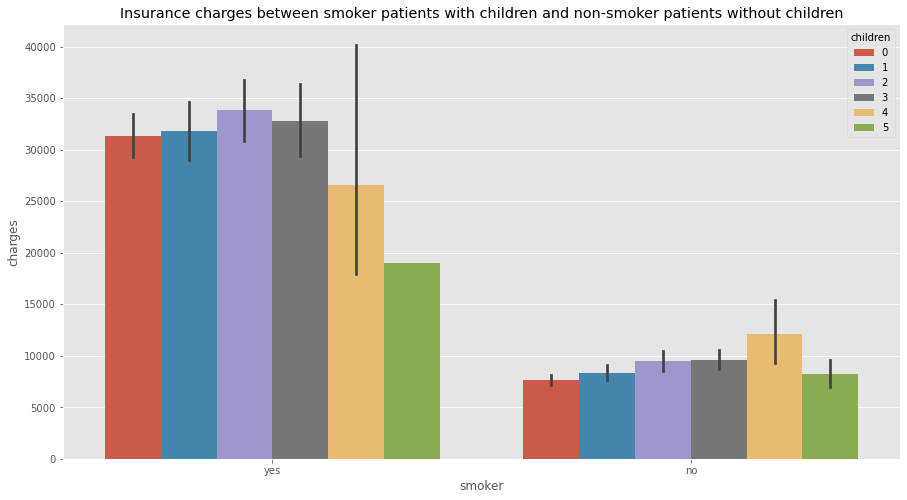

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Insurance charges between smoker patients with children and non-smoker patients without children')
sns.barplot(x='smoker', data=medical_df, hue= 'children', y='charges')
plt.show()

Observation:
1. Smoker patients with children have more insurance charges that non-smoker patients without children.

In [ ]:
#patients with no child =574
medical_df[(medical_df['children']<=0)]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
9,60,female,25.840,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1331,23,female,33.400,0,no,southwest,10795.93733
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## PART C
Complete the machine learning process and properly document each of the steps you took

In [ ]:
# importing the required machine learning libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# creating a copy of dataset
train_df = medical_df.copy()

In [ ]:
train_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#dropping the sex, region and smoker column, converting the categorical columns to machine language
sex= pd.get_dummies(train_df['sex'], drop_first= True)
smoker =pd.get_dummies(train_df['smoker'], drop_first =True)
region = pd.get_dummies(train_df['region'], drop_first = True)


In [ ]:
#adding features to the data set
train_df['is_smoker'] = smoker
train_df['is_male']= sex
train_df.head()

,age,sex,bmi,children,smoker,region,charges,is_smoker,is_male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [ ]:
#dropping the smoker, sex and region column
new_df = train_df.drop(['sex', 'region', 'smoker'],axis= True)
new_df.head()

,age,bmi,children,charges,is_smoker,is_male
0,19,27.900,0,16884.92400,1,0
1,18,33.770,1,1725.55230,0,1
2,28,33.000,3,4449.46200,0,1
3,33,22.705,0,21984.47061,0,1
4,32,28.880,0,3866.85520,0,1


In [ ]:
#defining the sex, smoker and region column
x = new_df.drop(['charges'], axis=1)
y = new_df['charges']

In [ ]:
check=new_df.corr()

In [ ]:
check

,age,bmi,children,charges,is_smoker,is_male
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292
is_smoker,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185
is_male,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000


In [ ]:
#identifying positive correlation with target variable
target_corr = abs(check['charges'])
positive_corr_target = target_corr[target_corr>(0.5)]
positive_corr_target

charges      1.000000
is_smoker    0.787251
Name: charges, dtype: float64

The correlation between charges and is_smoker is high

### Splitting the data

In [ ]:
# splitting the test and train data into a 75% train size and 25% test size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
#to print the shape of the train and test data
print("x Train : ", x_train.shape)
print("x Test : ", x_test.shape)
print("y Train : ", y_train.shape)
print("y Test : ", y_test.shape)

x Train :  (1003, 5)
x Test :  (335, 5)
y Train :  (1003,)
y Test :  (335,)


## Training a Linear Regression Model


We're now ready to train the model.
We are going to train 4 different models
1. Linear regression model
2. Lasso regression model
3. Ridge regression model
4. Random forest regressor model

## Training a Regression model

In [ ]:
#importing the linear model
from sklearn import linear_model
model = linear_model.LinearRegression()

#fitting the linear model into x_train, y_train
model = model.fit(x_train, y_train)

In [ ]:
#checking the score of x_train, y_train
model.score(x_train, y_train)

0.7441660615416086

In [ ]:
#displaying the x_train
x_train

,age,bmi,children,is_smoker,is_male
693,24,23.655,0,0,1
1297,28,26.510,2,0,0
634,51,39.700,1,0,1
1022,47,36.080,1,1,1
178,46,28.900,2,0,0
...,...,...,...,...,...
1095,18,31.350,4,0,0
1130,39,23.870,5,0,0
1294,58,25.175,0,0,1
860,37,47.600,2,1,0


In [ ]:
#splitting the y_train
y_train

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1003, dtype: float64

In [ ]:
#making predictions and assigning to a new variable
x_preds = model.predict(x_train)

In [ ]:
#getting the x_preds array
x_preds[0:15]

array([ 1754.57996913,  4533.44578628, 14466.05069057, 35868.37853991,
        9996.9583838 , 12670.09740354,  4985.01012854,  4904.37589928,
        4349.20487191,  2244.33304123,  8891.03049119,  7341.57470416,
        2648.86963266, 13478.99813246,  8747.38016855])

In [ ]:
#calculating the MSE, MAE and the score to check the performance of the model

from sklearn.metrics import r2_score

train_rmse = mean_squared_error(y_train, x_preds, squared=0)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_train,x_preds))

train_rmse = mean_absolute_error(y_train, x_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 6092.54026520953.
R2 score 0.7441660615416086
The RMAE loss for the training set is 4185.62124813945.


In [ ]:
#getting our x_test
x_test

,age,bmi,children,is_smoker,is_male
764,45,25.175,2,0,0
887,36,30.020,0,0,0
890,64,26.885,0,1,0
1293,46,25.745,3,0,1
259,19,31.920,0,1,1
...,...,...,...,...,...
342,60,27.550,0,0,0
308,58,34.865,0,0,1
1128,34,32.800,1,0,1
503,19,30.250,0,1,1


In [ ]:
#getting our y_test
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

In [ ]:
y_preds = model.predict(x_test)
pd.Series(y_preds)

0       8516.761620
1       6893.859056
2      36776.198772
3       9464.380662
4      26789.922546
           ...     
330    12325.644825
331    14267.744340
332     7785.278314
333    26242.897358
334     9416.394525
Length: 335, dtype: float64

In [ ]:
#calculating the MSE, MAE and the score to check the performance of the model

train_rmse = mean_squared_error(y_train, x_preds, squared=0)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_test,y_preds))

train_rmse = mean_absolute_error(y_test, y_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 6092.54026520953.
R2 score 0.7652077247609824
The RMAE loss for the training set is 4268.696637974911.


In [ ]:
#getting the weights assigned to different columns, to check which column has more importance in the dataset
weights = model.coef_
weights

array([  260.03578967,   327.55999306,   434.80431165, 23628.2381829 ,
          66.06974502])

In [ ]:
#creating a dataframe to check the weights assigned to different columns
weight_df = pd.DataFrame({
    'columns':x_train.columns,
    'weight': weights}).sort_values('weight', ascending=False)

In [ ]:
#viewing the first five columns of our dataset
weight_df.head()

,columns,weight
3,is_smoker,23628.238183
2,children,434.804312
1,bmi,327.559993
0,age,260.035790
4,is_male,66.069745


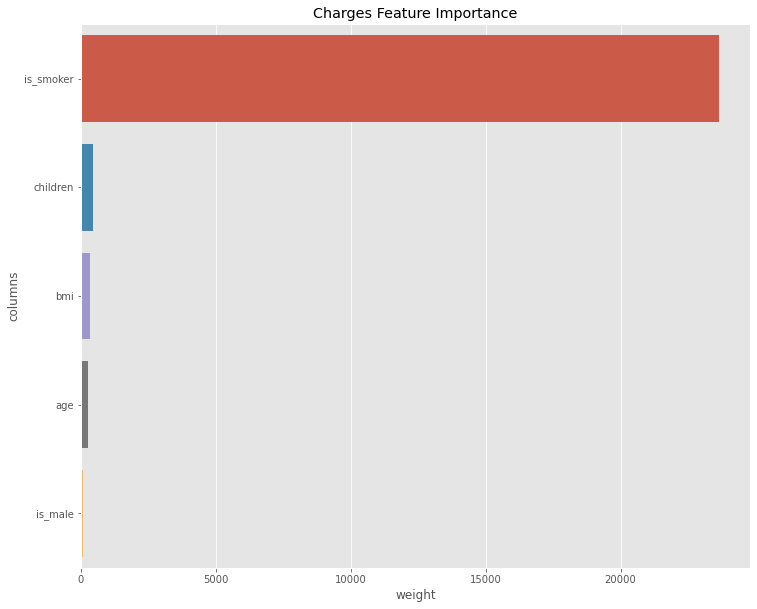

In [ ]:
#using a plot to visualize the charges feature importance, its effect on different columns
plt.figure(figsize=(12,10))
plt.title("Charges Feature Importance")
sns.barplot(y=weight_df.head()['columns'], x=weight_df.head()['weight']);

Observation
1. Insurance charges have more effect on smokers.

### Ridge regression

In [ ]:
R=Ridge(alpha=0.0001)

In [ ]:
#fitting the ridge model into x_train and y_train
R.fit(x_train, y_train)

Ridge(alpha=0.0001)

In [ ]:
#making predictions and saving it to  a new variable
y_preds=R.predict(x_test)

In [ ]:
#calculating the performance of the model using MSE, MAE and score

train_rmse = mean_squared_error(y_test, y_preds, squared=0)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_test,y_preds))

train_rmse = mean_absolute_error(y_test, y_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 5952.1489824946775.
R2 score 0.7652077015311941
The RMAE loss for the training set is 4268.697981106841.


### Lasso Regression model

In [ ]:
lasso = Lasso(alpha=1.0, max_iter=100, tol=0.01)

In [ ]:
#fitting the lasso model into our x_train and y_train
lasso.fit(x_train, y_train)

Lasso(max_iter=100, tol=0.01)

In [ ]:
#making predictions and saving it to a new variable
y_preds = lasso.predict(x_test)

In [ ]:
pd.Series(y_preds)

0       8519.376185
1       6897.651360
2      36773.965043
3       9462.642125
4      26784.264304
           ...     
330    12329.273690
331    14267.484037
332     7784.689225
333    26237.281910
334     9416.328521
Length: 335, dtype: float64

In [ ]:
#calculating the performance of the model

train_rmse = mean_squared_error(y_train, x_preds, squared=0)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_test,y_preds))

train_rmse = mean_absolute_error(y_test, y_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 6092.54026520953.
R2 score 0.76520642458265
The RMAE loss for the training set is 4269.0712069717765.


### RandomForestRegressor


In [ ]:
RFR = RandomForestRegressor(ccp_alpha=1.0)

In [ ]:
#fitting the RFR model into our x_train and y_train
RFR.fit(x_train, y_train)

RandomForestRegressor(ccp_alpha=1.0)

In [ ]:
#making predictions and saving it to a new variable
y_preds = RFR.predict(x_test)

In [ ]:
pd.Series(y_preds)

0      11420.288593
1       5591.391137
2      28024.019750
3       9580.673984
4      34373.811477
           ...     
330    12816.665130
331    12199.804102
332     5210.154426
333    33556.239393
334     7233.933024
Length: 335, dtype: float64

In [ ]:
#calculating the performance of the model

train_rmse = mean_squared_error(y_test, y_preds, squared=0)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_test,y_preds))

train_rmse = mean_absolute_error(y_test, y_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 4920.828189367162.
R2 score 0.8395230487576602
The RMAE loss for the training set is 2673.434813317592.


# Building a Helper Function

In [ ]:
# adding all regression algorithm to test in a list
model_list = [LinearRegression(), Ridge(), RandomForestRegressor(), Lasso()]

In [ ]:
# building a helper function to multi test several regression model
def check_model(model, X_train, y_train, X_test, y_test):
    print(model)
    model = model
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    error = mean_absolute_error(y_test,y_preds)
    train_rmse = mean_squared_error(y_test, y_preds, squared=False)
    score = model.score(x_train,y_train)
    print(f"The model's mean absolute error: {error}")
    print(f'The model scored: {round(score, 2)}')
    print('The RMSE loss for the training set is {}.'.format(train_rmse))
    print('\n')

In [ ]:
for model in model_list:
    print('-------------checking machine learning model-------------')
    check_model(model, x_train, y_train, x_test, y_test)

-------------checking machine learning model-------------
LinearRegression()
The model's mean absolute error: 4268.696637974911
The model scored: 0.74
The RMSE loss for the training set is 5952.148688048979.


-------------checking machine learning model-------------
Ridge()
The model's mean absolute error: 4282.044924370956
The model scored: 0.74
The RMSE loss for the training set is 5955.354078804622.


-------------checking machine learning model-------------
RandomForestRegressor()
The model's mean absolute error: 2633.681022855871
The model scored: 0.97
The RMSE loss for the training set is 4897.985660433824.


-------------checking machine learning model-------------
Lasso()
The model's mean absolute error: 4269.071172431356
The model scored: 0.74
The RMSE loss for the training set is 5952.165309228473.


